In [1]:
dach_length = [55, 57, 64, 63, 58, 49, 54, 61]
dach_height = [30, 31, 36, 30, 33, 25, 37, 34]
jin_length = [56, 47, 56, 46, 49, 53, 52, 48]
jin_height = [52, 52, 50, 53, 50, 53, 49, 54]

In [2]:
import numpy as np

d = np.column_stack((dach_length, dach_height))
j = np.column_stack((jin_length, jin_height))
X = np.concatenate((d, j))   # 데이터 집합
y = [0]*len(d) + [1]*len(j)  # 레이블 집합
print('dogs :', X)
print('labels :', y)

dogs : [[55 30]
 [57 31]
 [64 36]
 [63 30]
 [58 33]
 [49 25]
 [54 37]
 [61 34]
 [56 52]
 [47 52]
 [56 50]
 [46 53]
 [49 50]
 [53 53]
 [52 49]
 [48 54]]
labels : [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]


In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svm = Pipeline([  # 표준 스케일러, 선형 SVM 분류기를 파이프라인에 넘겨줌
               ('scaler', StandardScaler()),
               ('linearSVC', LinearSVC(C=1, loss='hinge'))
])
svm.fit(X, y)     # 이 svm 파이프라인에 X, y 값을 넣어 학습시킴

Pipeline(steps=[('scaler', StandardScaler()),
                ('linearSVC', LinearSVC(C=1, loss='hinge'))])

In [4]:
dog_classes = {0:'Dachshund', 1:'Jindo dog'}
data1, data2 = [59, 35], [53, 54]
y_pred = svm.predict([data1])
print('데이터 :', data1, ', 판정 결과:', dog_classes[y_pred[0]])
y_pred = svm.predict([data2])
print('데이터 :', data2, ', 판정 결과:', dog_classes[y_pred[0]])

데이터 : [59, 35] , 판정 결과: Dachshund
데이터 : [53, 54] , 판정 결과: Jindo dog


In [5]:
import pandas as pd
import numpy as np

data_loc = 'https://github.com/dongupak/DataML/raw/main/csv/'
df = pd.read_csv(data_loc + 'two_classes.csv')
df.tail(3)

,x1,x2,y
997,-4.634470,0.300158,0
998,1.426275,-2.765590,1
999,1.988053,1.466494,1


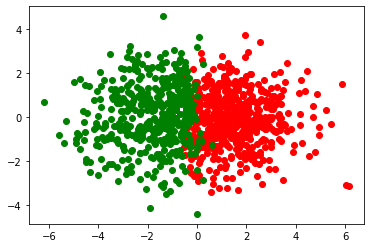

In [6]:
df_positive = df[df['y']==1]    
df_negative = df[df['y']==0]  
import matplotlib.pyplot as plt
plt.scatter(df_positive['x1'], df_positive['x2'], color='r')
plt.scatter(df_negative['x1'], df_negative['x2'], color='g')

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
X = df[['x1', 'x2']].to_numpy()         
y = df['y']                            
svm = Pipeline([('scaler', StandardScaler()),
                ('linearSVC', LinearSVC(C=1, loss='hinge'))
])
svm.fit(X, y)    

Pipeline(steps=[('scaler', StandardScaler()),
                ('linearSVC', LinearSVC(C=1, loss='hinge'))])

In [9]:
svm.predict([[0.17, 0.06], [6, 25], [-20, 5], [7, 21]])

array([1, 1, 0, 1], dtype=int64)